In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 5 Simple time series

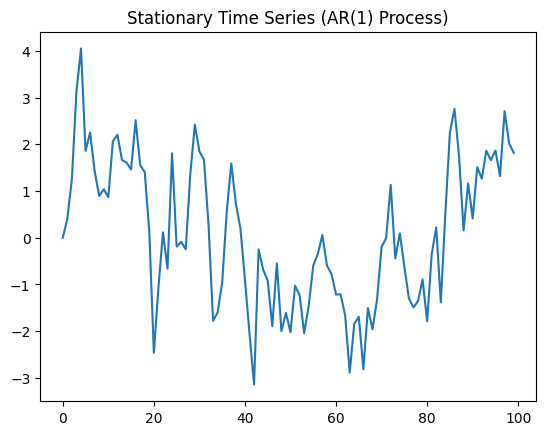

Mean: 0.0981342107971759
Variance: 2.413581897726639
Lag-1 Autocorrelation: 0.7727922641842142


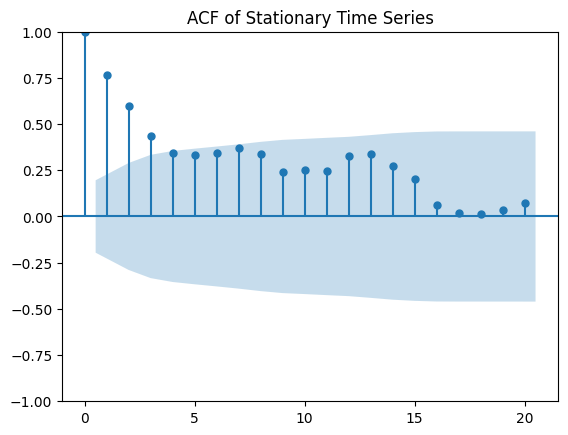

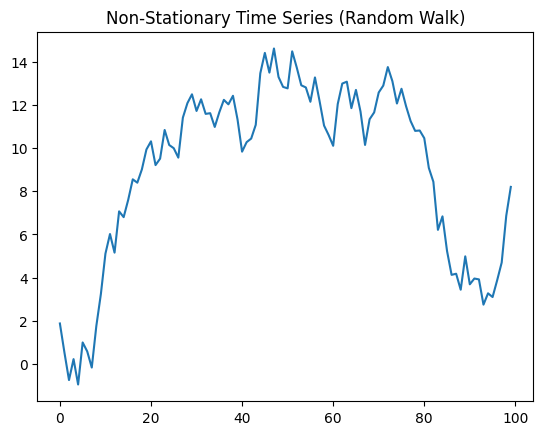

Mean: 9.00705506282621
Variance: 16.9942719363812
Lag-1 Autocorrelation: 0.9691043036238743


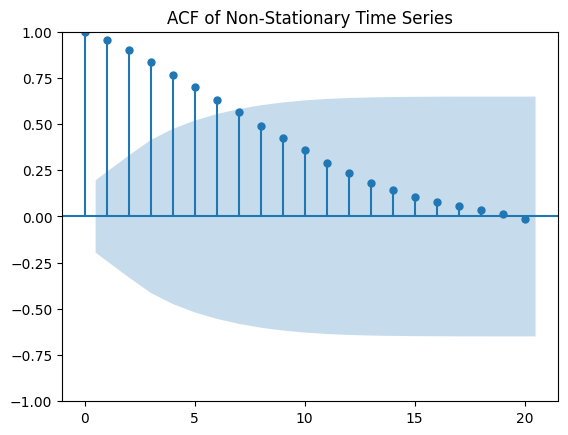

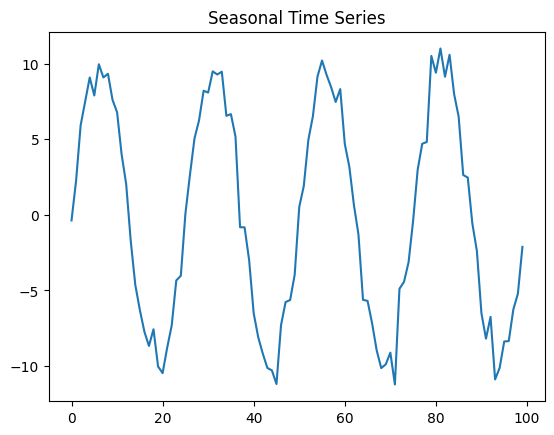

Mean: -0.05923226055966274
Variance: 50.32894221879069
Lag-1 Autocorrelation: 0.9479927102481304


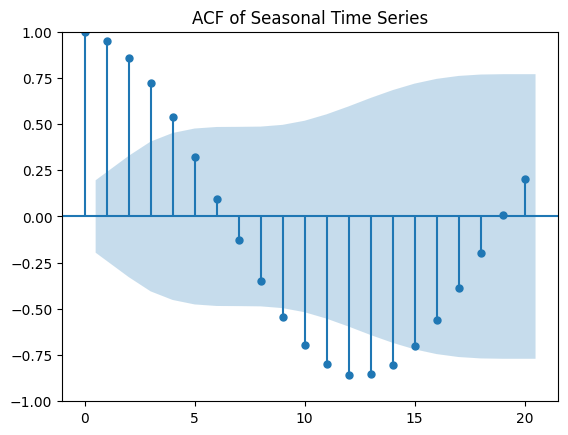

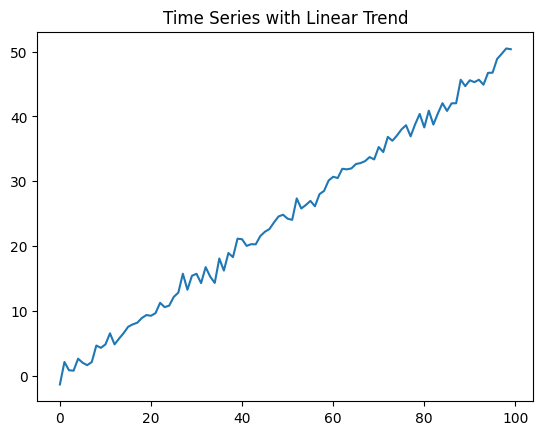

Mean: 24.553203293454086
Variance: 210.2764224344599
Lag-1 Autocorrelation: 0.9956735441325238


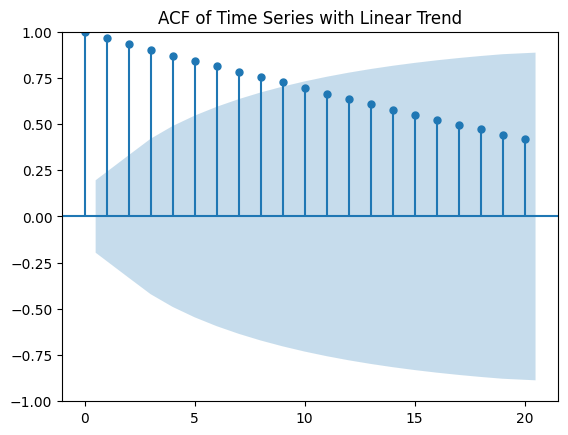

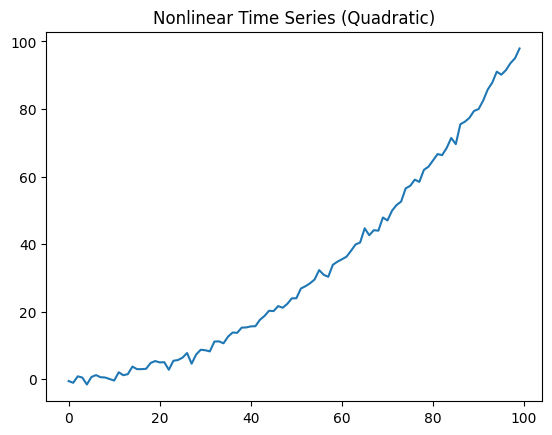

Mean: 32.82243578416108
Variance: 875.8051289517297
Lag-1 Autocorrelation: 0.9987667305893687


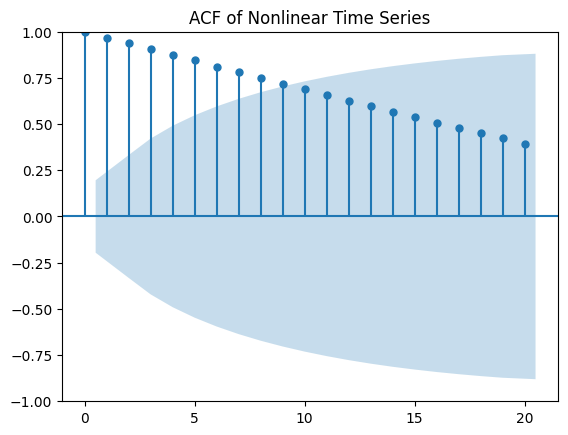

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Function to compute basic statistics
def compute_basic_statistics(y):
    mean = np.mean(y)
    variance = np.var(y)
    autocorrelation = np.corrcoef(y[:-1], y[1:])[0, 1]  # Lag-1 autocorrelation
    
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Lag-1 Autocorrelation: {autocorrelation}")
    
    return mean, variance, autocorrelation

# Function to plot ACF
def plot_acf_custom(y, title="Autocorrelation Function (ACF)"):
    plot_acf(y, lags=20)
    plt.title(title)
    plt.show()

# Stationary
np.random.seed(0)
n = 100
ar = np.array([0.7])  # AR(1) coefficient
noise = np.random.normal(0, 1, n)
y_stationary = np.zeros(n)
for t in range(1, n):
    y_stationary[t] = ar[0] * y_stationary[t-1] + noise[t]

plt.plot(y_stationary)
plt.title('Stationary Time Series (AR(1) Process)')
plt.show()

compute_basic_statistics(y_stationary)
plot_acf_custom(y_stationary, title="ACF of Stationary Time Series")

# Non-Stationary
steps = np.random.normal(0, 1, n)
y_non_stationary = np.cumsum(steps)

plt.plot(y_non_stationary)
plt.title('Non-Stationary Time Series (Random Walk)')
plt.show()

compute_basic_statistics(y_non_stationary)
plot_acf_custom(y_non_stationary, title="ACF of Non-Stationary Time Series")

# Seasonal
t = np.arange(n)
y_seasonal = 10 * np.sin(2 * np.pi * t / 25) + np.random.normal(0, 1, n)

plt.plot(y_seasonal)
plt.title('Seasonal Time Series')
plt.show()

compute_basic_statistics(y_seasonal)
plot_acf_custom(y_seasonal, title="ACF of Seasonal Time Series")

# Linear Trend
y_linear = 0.5 * t + np.random.normal(0, 1, n)

plt.plot(y_linear)
plt.title('Time Series with Linear Trend')
plt.show()

compute_basic_statistics(y_linear)
plot_acf_custom(y_linear, title="ACF of Time Series with Linear Trend")

# Nonlinear
y_nonlinear = 0.01 * t**2 + np.random.normal(0, 1, n)

plt.plot(y_nonlinear)
plt.title('Nonlinear Time Series (Quadratic)')
plt.show()

compute_basic_statistics(y_nonlinear)
plot_acf_custom(y_nonlinear, title="ACF of Nonlinear Time Series")


## K-means clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example features: mean, variance, lag-1 autocorrelation
features = np.array([
    [np.mean(y_stationary), np.var(y_stationary), np.corrcoef(y_stationary[:-1], y_stationary[1:])[0, 1]],
    [np.mean(y_non_stationary), np.var(y_non_stationary), np.corrcoef(y_non_stationary[:-1], y_non_stationary[1:])[0, 1]],
    [np.mean(y_seasonal), np.var(y_seasonal), np.corrcoef(y_seasonal[:-1], y_seasonal[1:])[0, 1]],
    [np.mean(y_linear), np.var(y_linear), np.corrcoef(y_linear[:-1], y_linear[1:])[0, 1]],
    [np.mean(y_nonlinear), np.var(y_nonlinear), np.corrcoef(y_nonlinear[:-1], y_nonlinear[1:])[0, 1]]
])

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(features_scaled)

# Print cluster labels
print("Cluster labels:", kmeans.labels_)


Cluster labels: [2 0 0 3 1]


c:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualizing clustering Results

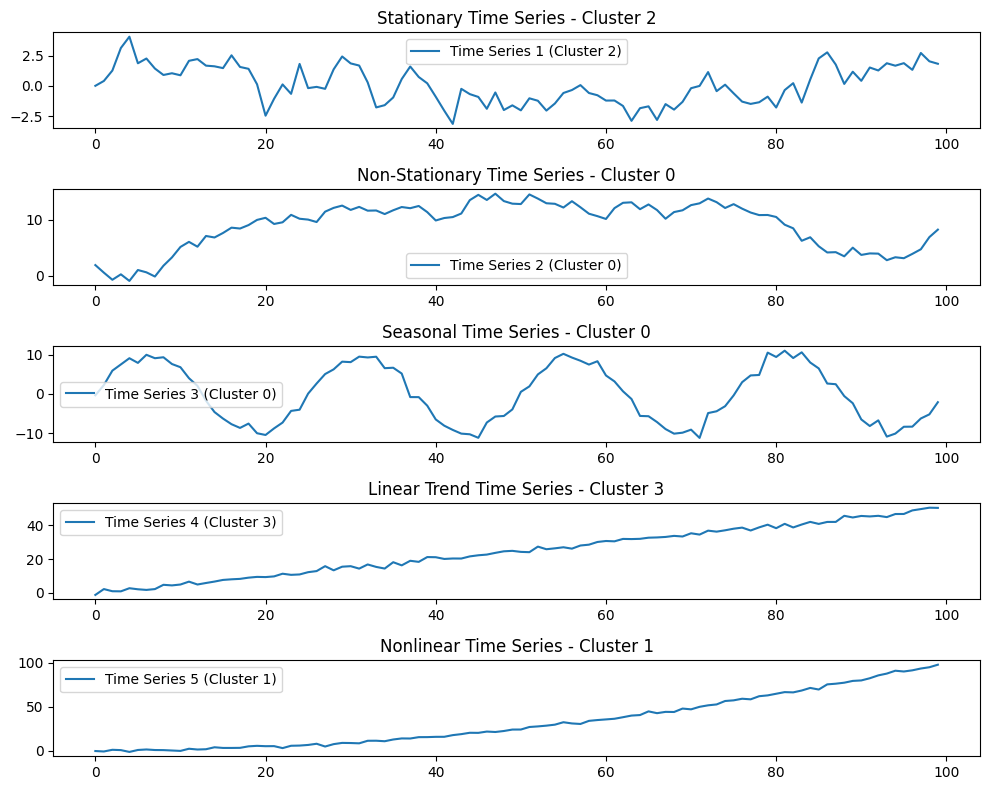

In [13]:
# Assuming 'kmeans' is the fitted KMeans model and 'features_scaled' is the standardized feature set
# Cluster labels from KMeans
cluster_labels = kmeans.labels_

# Plot each time series in its respective cluster
time_series_list = [y_stationary, y_non_stationary, y_seasonal, y_linear, y_nonlinear]
titles = ['Stationary', 'Non-Stationary', 'Seasonal', 'Linear Trend', 'Nonlinear']

plt.figure(figsize=(10, 8))

for i, (y, title) in enumerate(zip(time_series_list, titles)):
    plt.subplot(len(time_series_list), 1, i + 1)
    plt.plot(y, label=f'Time Series {i+1} (Cluster {cluster_labels[i]})')
    plt.title(f'{title} Time Series - Cluster {cluster_labels[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

c:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

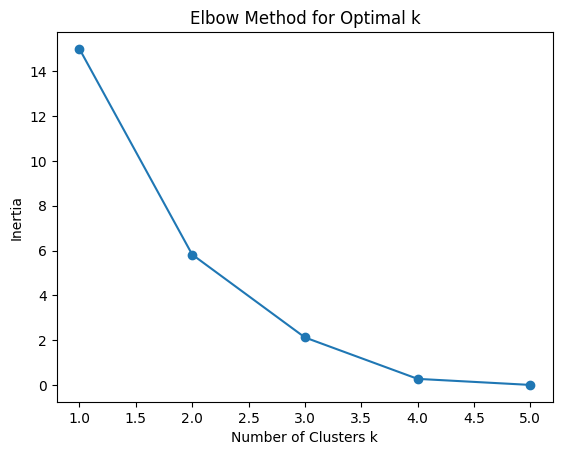

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for a range of k values
inertias = []
k_values = range(1, 6)  # Try 1 to 5 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.show()


## HMM

In [9]:
from hmmlearn import hmm
import numpy as np

# Example: Fitting HMM to one time series (e.g., y_stationary)
n_components = 2  # Number of hidden states (this can be adjusted)
model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
model.fit(y_stationary.reshape(-1, 1))

# Predict the hidden states
hidden_states = model.predict(y_stationary.reshape(-1, 1))
print("Hidden states for stationary series:", hidden_states)

Hidden states for stationary series: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


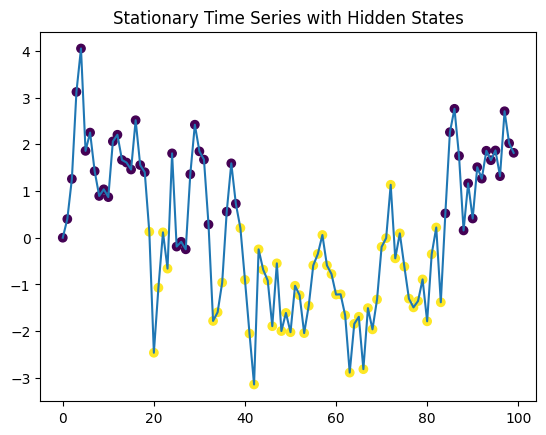

In [15]:
plt.plot(y_stationary, label='Time Series')
plt.scatter(np.arange(len(y_stationary)), y_stationary, c=hidden_states, cmap='viridis', marker='o')
plt.title('Stationary Time Series with Hidden States')
plt.show()


c:\Users\pierr\anaconda3\envs\research\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


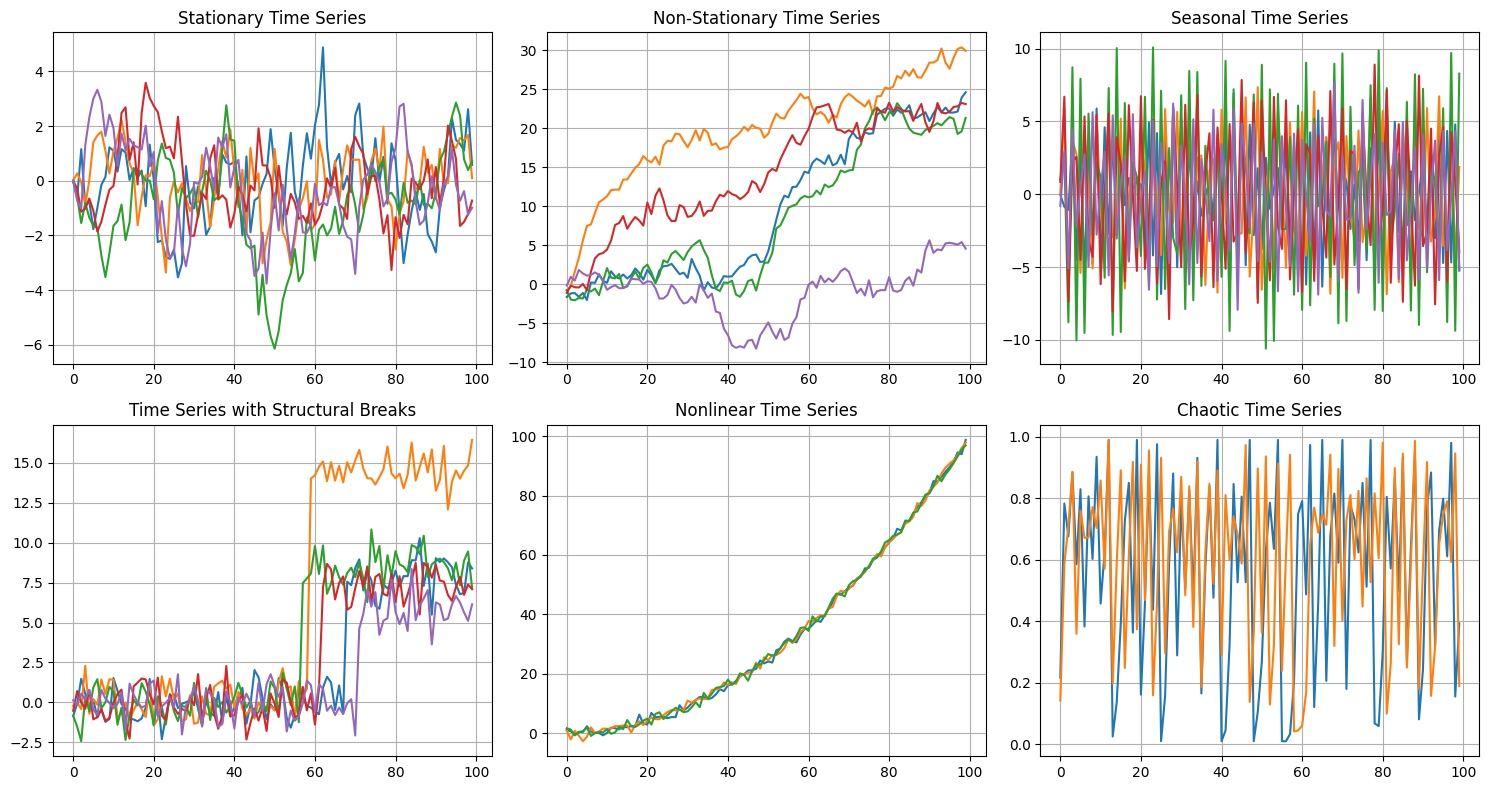

In [2]:
import numpy as np
import tsgm
import matplotlib.pyplot as plt

# Define parameters
seq_len = 100

# Helper function to plot datasets with 3 time series per row
def plot_datasets_in_grid(datasets_list, titles, n_cols=3):
    n_rows = len(datasets_list) // n_cols + (len(datasets_list) % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()

    for i, (dataset, title) in enumerate(zip(datasets_list, titles)):
        axes[i].set_title(title)
        for series in dataset:
            axes[i].plot(series)
        axes[i].grid(True)

    # Hide empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# 1. Stationary Time Series (AR(1) Processes)
stationary_datasets = []
for i in range(5):
    ar_coeff = np.random.uniform(0.5, 0.9)
    noise = np.random.normal(0, 1, seq_len)
    series = np.zeros(seq_len)
    for t in range(1, seq_len):
        series[t] = ar_coeff * series[t-1] + noise[t]
    stationary_datasets.append(series.reshape(-1, 1))

# 2. Non-Stationary Time Series (Random Walks and Trends)
non_stationary_datasets = []
for i in range(5):
    steps = np.random.normal(0, 1, seq_len)
    trend = np.random.uniform(0.1, 0.5)
    series = np.cumsum(steps) + trend * np.arange(seq_len)
    non_stationary_datasets.append(series.reshape(-1, 1))

# 3. Seasonal Time Series (Sine Waves with Noise)
seasonal_datasets = []
for i in range(5):
    freq = np.random.uniform(0.1, 0.5)
    amplitude = np.random.uniform(5, 10)
    noise = np.random.normal(0, 1, seq_len)
    series = amplitude * np.sin(2 * np.pi * freq * np.arange(seq_len)) + noise
    seasonal_datasets.append(series.reshape(-1, 1))

# 4. Time Series with Structural Breaks
structural_break_datasets = []
for i in range(5):
    breakpoint = np.random.randint(seq_len // 4, 3 * seq_len // 4)
    series = np.random.normal(0, 1, seq_len)
    series[breakpoint:] += np.random.uniform(5, 15)
    structural_break_datasets.append(series.reshape(-1, 1))

# 5. Nonlinear Time Series
nonlinear_datasets = []
for i in range(3):
    series = 0.01 * np.square(np.arange(seq_len)) + np.random.normal(0, 1, seq_len)
    nonlinear_datasets.append(series.reshape(-1, 1))

# 6. Chaotic Time Series
chaotic_datasets = []
for i in range(2):
    series = np.zeros(seq_len)
    series[0] = np.random.uniform(0.1, 0.9)
    for t in range(1, seq_len):
        series[t] = 3.8 * series[t-1] * (1 - series[t-1]) + np.random.normal(0, 0.1)
        series[t] = np.clip(series[t], 0.01, 0.99)
    chaotic_datasets.append(series.reshape(-1, 1))

# Combine all datasets into a list
all_datasets = [
    stationary_datasets, 
    non_stationary_datasets, 
    seasonal_datasets, 
    structural_break_datasets, 
    nonlinear_datasets, 
    chaotic_datasets
]

# Titles for the plots
titles = [
    "Stationary Time Series",
    "Non-Stationary Time Series",
    "Seasonal Time Series",
    "Time Series with Structural Breaks",
    "Nonlinear Time Series",
    "Chaotic Time Series"
]

# Plot datasets in a 3-column grid
plot_datasets_in_grid(all_datasets, titles, n_cols=3)
